In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\borab\Downloads\titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [4]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
df['Cabin'] = df['Cabin'].fillna("Unknown") 
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [6]:
df = df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
print("number of duplicate rows =", df.duplicated().sum())

number of duplicate rows = 0


In [8]:
df.columns = df.columns.str.lower()
df.dtypes

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

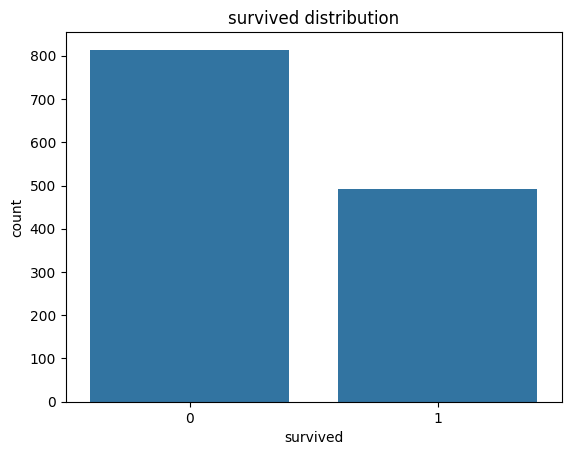

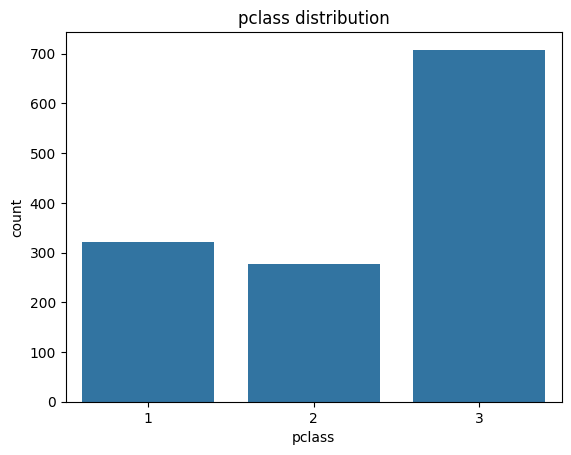

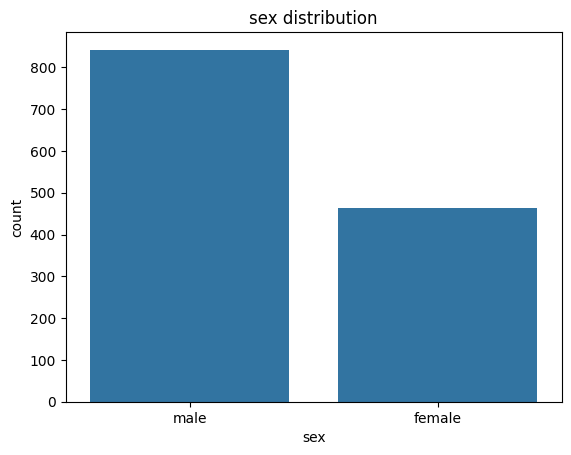

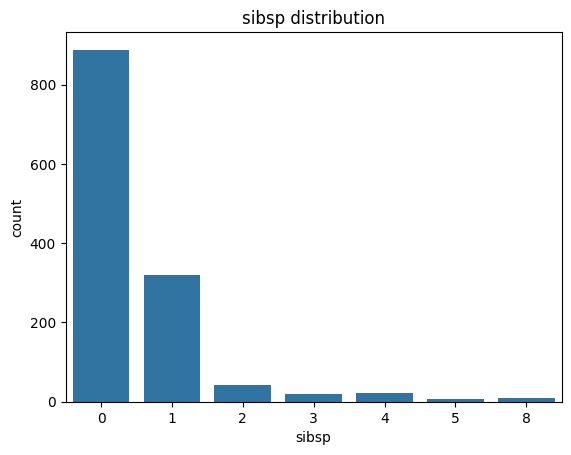

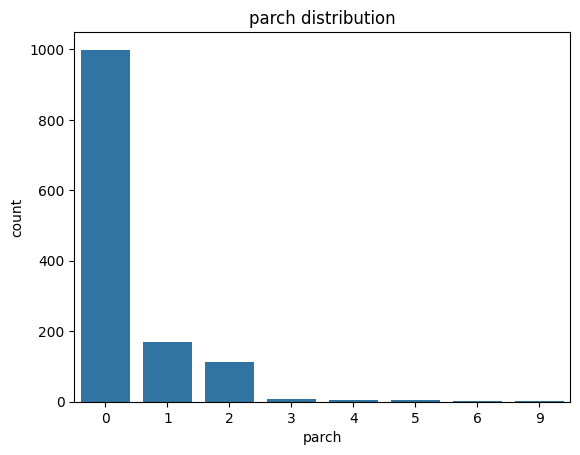

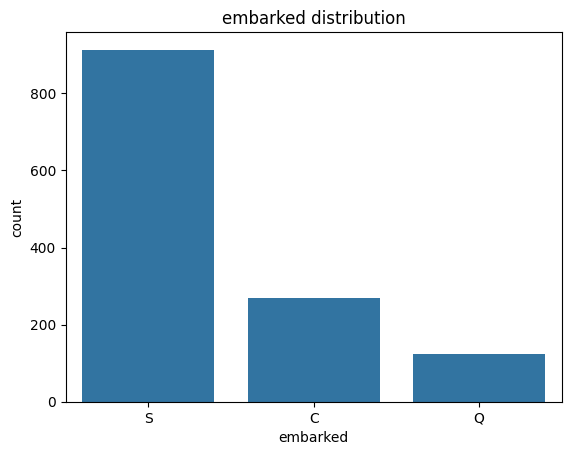

In [11]:
columns = ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked']

for name in columns:
    sns.countplot(x= name , data=df)
    plt.title(f"{name} distribution")
    plt.show()

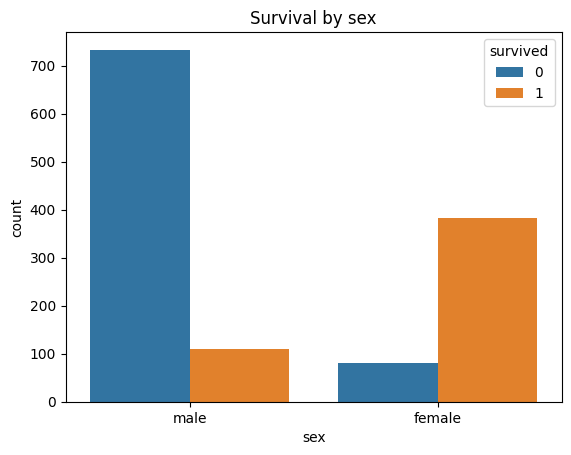

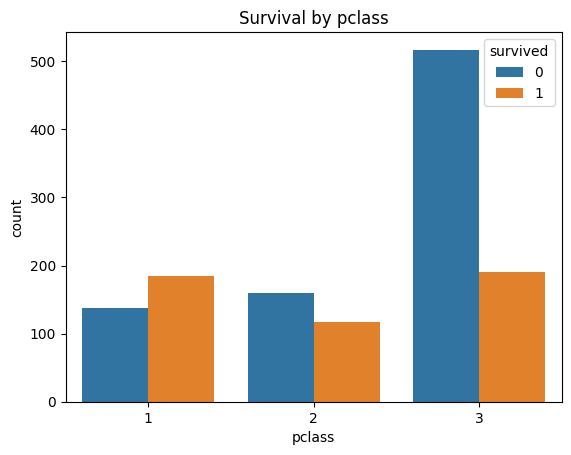

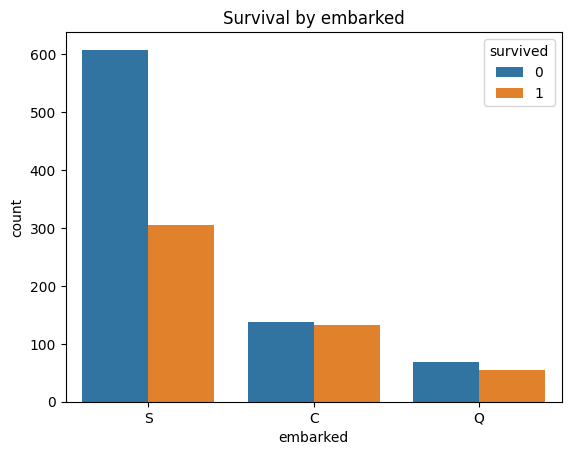

In [12]:
list2 = ['sex', 'pclass', 'embarked']

for nums in list2:
    sns.countplot(x=nums, hue="survived", data=df)
    plt.title(f"Survival by {nums}")
    plt.show()

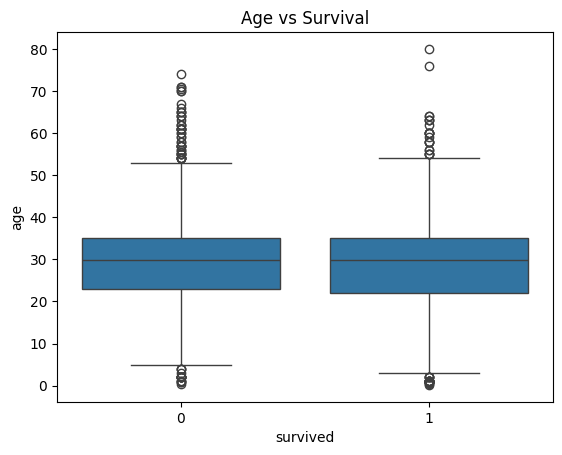

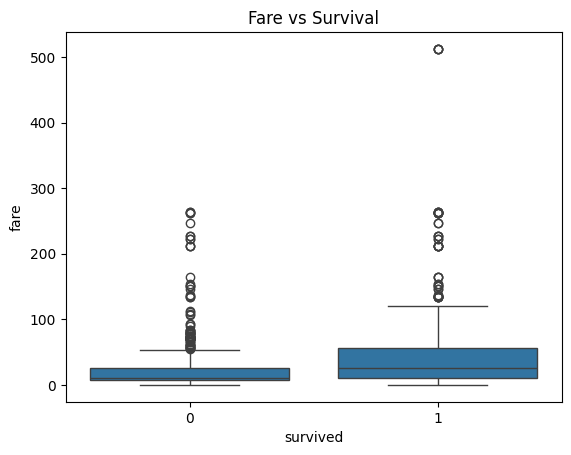

In [15]:
sns.boxplot(x="survived", y="age", data=df)
plt.title("Age vs Survival")
plt.show()

sns.boxplot(x="survived", y="fare", data=df)
plt.title("Fare vs Survival")
plt.show()

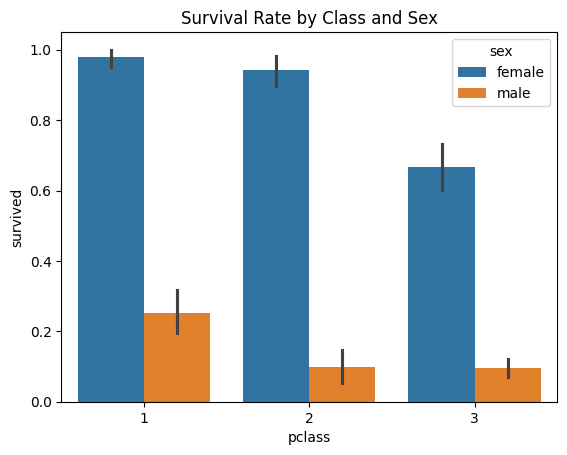

In [18]:
sns.barplot(x="pclass", y="survived", hue="sex", data=df)
plt.title("Survival Rate by Class and Sex")
plt.show()

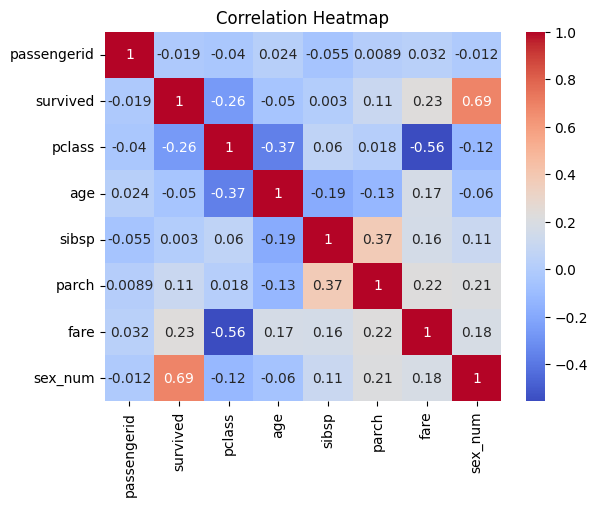

In [23]:
df["sex_num"] = df["sex"].map({"male": 0, "female": 1})

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()